In [1]:
# Ensemble(앙상블 기법) : Model 들을 같이 엮어서 사용하는 방법, 예측력이 아주아주 높다.

In [2]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [3]:
# Sampling 
set.seed(1234)
library(caret)
samp <- createDataPartition(iris$Species, p =0.7, list=F) #P(퍼센트):데이터가 많을 경우 0.8
# 학습용 데이터 만들기
data.tr <- iris[samp,]
# 검증용 데이터 만들기
data.test<-iris[-samp,]
# 문제 및 정답 만들기
x <- subset(data.test,select =-Species)
y <- data.test$Species

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [4]:
# 학습시키기
model.rf <- randomForest(Species ~., data = data.tr, ntree = 100)

In [5]:
# 검증하기
pred <- predict(model.rf, x)

In [6]:
# 예측력과 오분류표
mean(pred == y)
table(pred, y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기 (회귀식과 RandomForest 예측비교)

In [7]:
seoul <- read.csv("../../Data/newSeoul2019.csv")
head(seoul)
tail(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


In [8]:
# 종로구 데이터셋 만들기
jungRo <- subset(seoul,자치구명=='종로구')
jungRo

,년도,월,자치구명,발생건수,사망자수,부상자수
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163
7,2011,7,종로구,103,1,154
8,2011,8,종로구,122,1,171
9,2011,9,종로구,121,2,166
10,2011,10,종로구,135,2,193


In [10]:
# row names 정리하기
rownames(jungRo)<-c()
head(jungRo)
tail(jungRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [11]:
str(jungRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [12]:
# factor 정리하기
jungRo$자치구명 <- factor(jungRo$자치구명)
str(jungRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [13]:
# 종로의 발생건수와 부상자수 상관계수
cor(jungRo$발생건수, jungRo$부상자수)

[1] 0.9208914

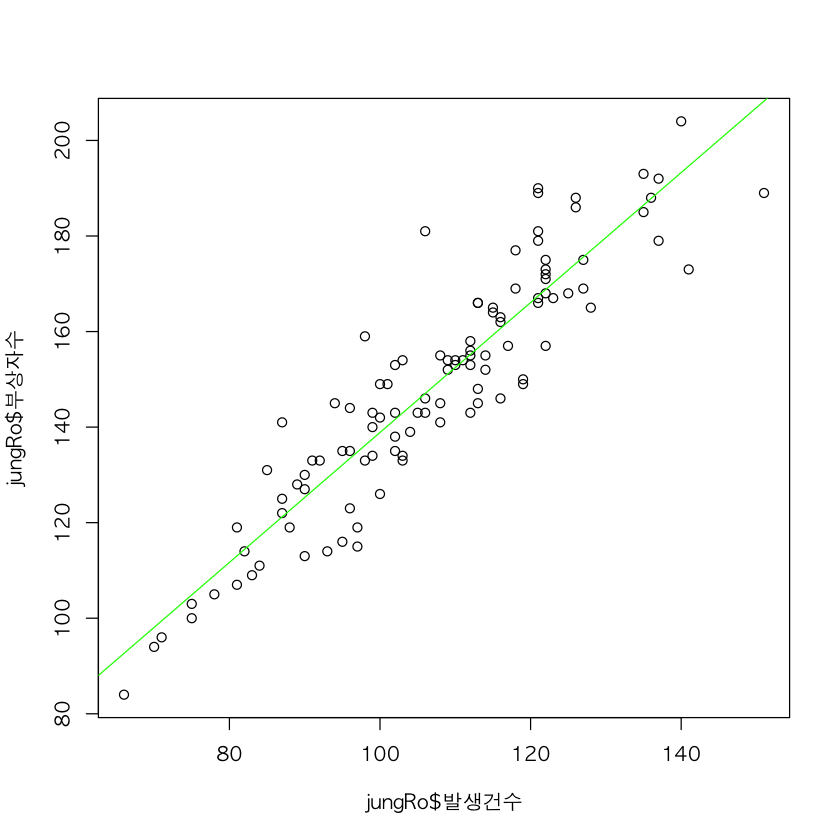

In [14]:
# 종로구의 발생건수와 부상자수의 산포도와 희귀선 그리기
options(warn = -1)
par(family="AppleGothic")
plot(jungRo$발생건수,jungRo$부상자수)
i<-lm(jungRo$부상자수~jungRo$발생건수)
abline(i,col="green")

In [15]:
# 예측력
summary(i)


Call:
lm(formula = jungRo$부상자수 ~ jungRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
jungRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


- p-value: < 2.2e-16
 
- Adjusted R-squared:  0.8466 

- Residual standard error: 9.816 on 106 degrees of freedom

In [16]:
i


Call:
lm(formula = jungRo$부상자수 ~ jungRo$발생건수)

Coefficients:
    (Intercept)  jungRo$발생건수  
          2.886            1.360  


In [17]:
cat(1.360 * 100 -4.98,"~",0.1241 * 100+4.98)

131.02 ~ 17.39

In [18]:
# 회귀식
# - 발생건수가 100건일 경우의 부상자수 예측
1.360 * 100 + (2.886)

[1] 138.886

In [19]:
jungRo1 <-lm(부상자수 ~ 발생건수, data = jungRo)

In [20]:
summary(jungRo1)


Call:
lm(formula = 부상자수 ~ 발생건수, data = jungRo)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.88612    6.05535   0.477    0.635    
발생건수     1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


p-value: < 2.2e-16
Adjusted R-squared:  0.8466 
Residual standard error: 9.816 on 106 degrees of freedom

In [21]:
jungRo1


Call:
lm(formula = 부상자수 ~ 발생건수, data = jungRo)

Coefficients:
(Intercept)     발생건수  
      2.886        1.360  


In [31]:
1.360 * 100 + 2.886

[1] 138.886

In [32]:
cat(1.360 * 100 - 9.816,"~",1.360 * 100 + 9.816)

126.184 ~ 145.816

In [33]:
# 랜덤 포레스트로 예측
# - 발생건수가 100건일 경우의 부상자수 예측
# Sampling 
library(caret)

# 학습용 데이터 만들기
data.tr <- seoul[,]
# 문제 및 정답 만들기
x <- subset(data.test,select =-발생건수)
y <- data.test$발생건수

In [38]:
# 학습시키기
jungRo.rf <- randomForest(부상자수 ~ 발생건수, data = data.tr, ntree = 100) #ctree 

In [39]:
jungRo.rf


Call:
 randomForest(formula = 부상자수 ~ 발생건수, data = data.tr,      ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 254.0603
                    % Var explained: 95.85